In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [425]:
df = pd.read_csv("/Users/sa2/Desktop/TKH/Music-Recommendation-Algorithm/clean.csv")

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28362 entries, 0 to 28361
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   dating                    28362 non-null  float64
 1   violence                  28362 non-null  float64
 2   world/life                28362 non-null  float64
 3   night/time                28362 non-null  float64
 4   shake the audience        28362 non-null  float64
 5   family/gospel             28362 non-null  float64
 6   romantic                  28362 non-null  float64
 7   communication             28362 non-null  float64
 8   obscene                   28362 non-null  float64
 9   music                     28362 non-null  float64
 10  movement/places           28362 non-null  float64
 11  light/visual perceptions  28362 non-null  float64
 12  family/spiritual          28362 non-null  float64
 13  sadness                   28362 non-null  float64
 14  feelin

## KMeans without Scaling

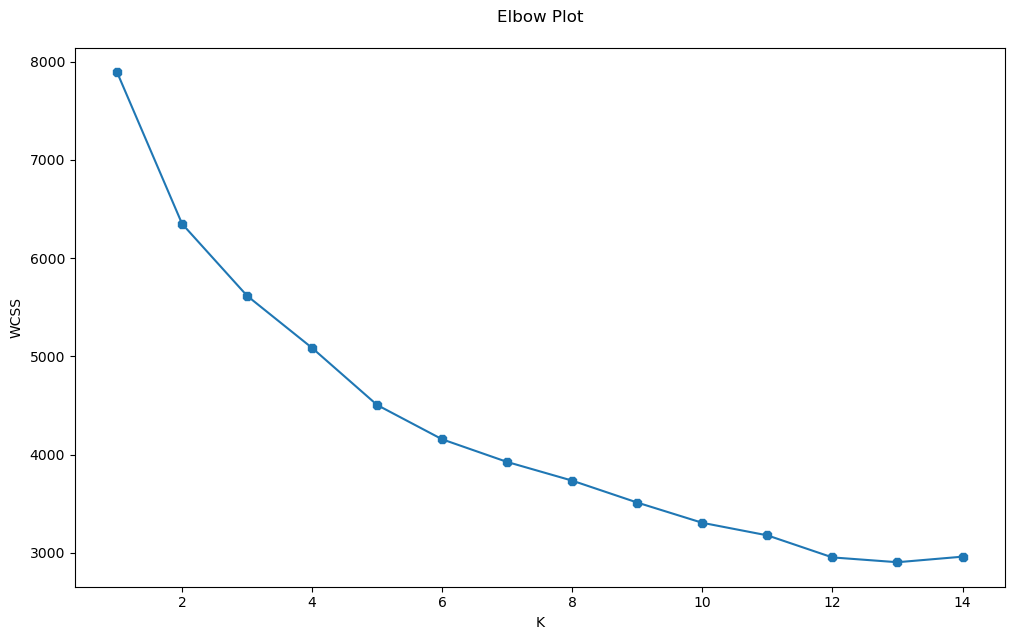

In [427]:

X1 = df.loc[:, ['dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual', 'sadness', 'feelings', 'age']].values

wcss= []
for k in range(1, 15):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state=50)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
    

plt.figure(figsize = (12, 7))

plt.plot(range(1, 15), wcss, marker = '8')
plt.title('Elbow Plot\n')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

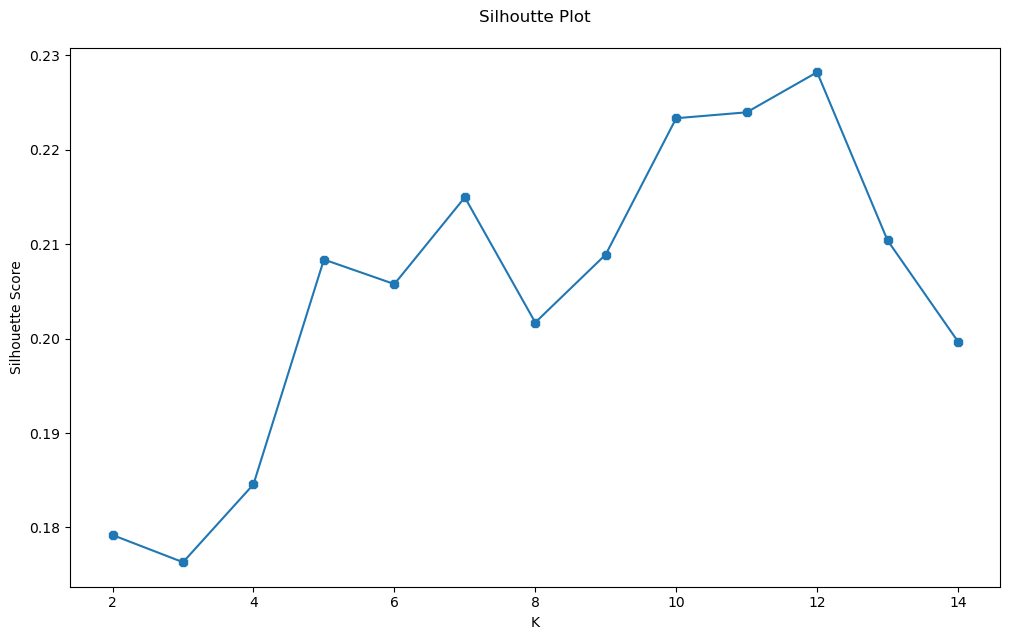

In [428]:
silhouette = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state=50)
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 15), silhouette, marker = '8')
plt.title('Silhoutte Plot\n')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

according to both plots, 12 is the best number of clusters

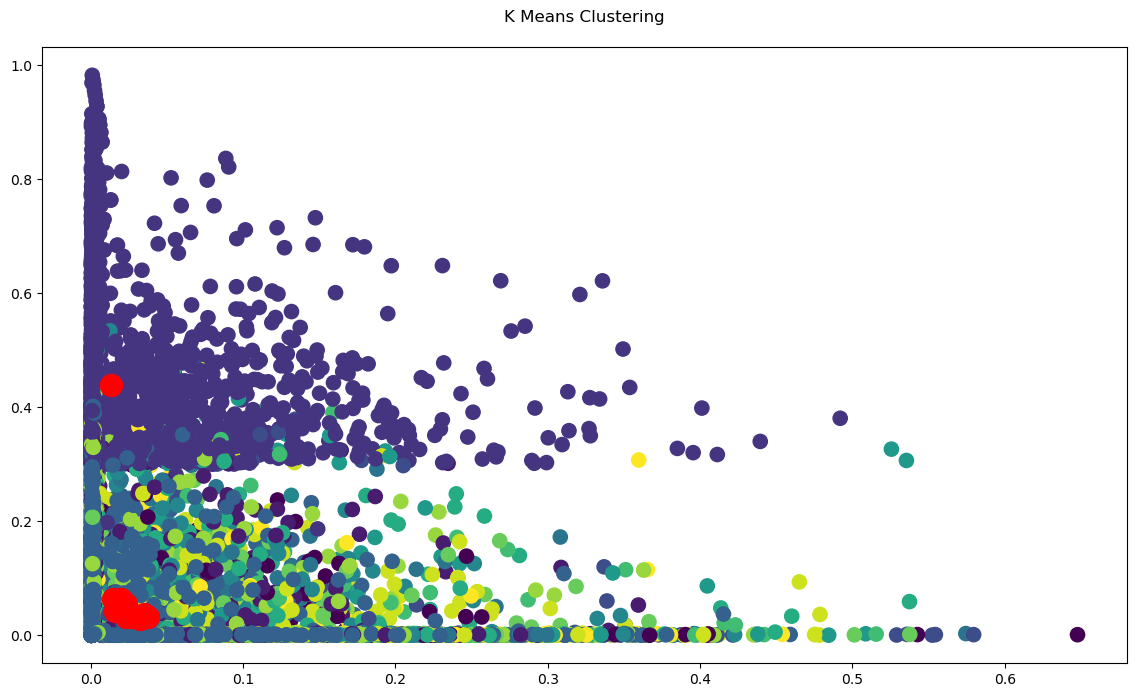

In [429]:
plt.figure(figsize = (14, 8))
plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('K Means Clustering\n')
plt.xlabel('')
plt.ylabel('')
plt.show()

- the centroids are concentrated in the region near the origin
- concentration of data points near the bottom left, with two triangular spread (could mean skewed distribution)
- too many dimensions for this plot to be understood

because the data is alredy normalized the title of this section is misleading, the next section wont be kmeans with scaling but pca (to reduce dimensionality)

## PCA

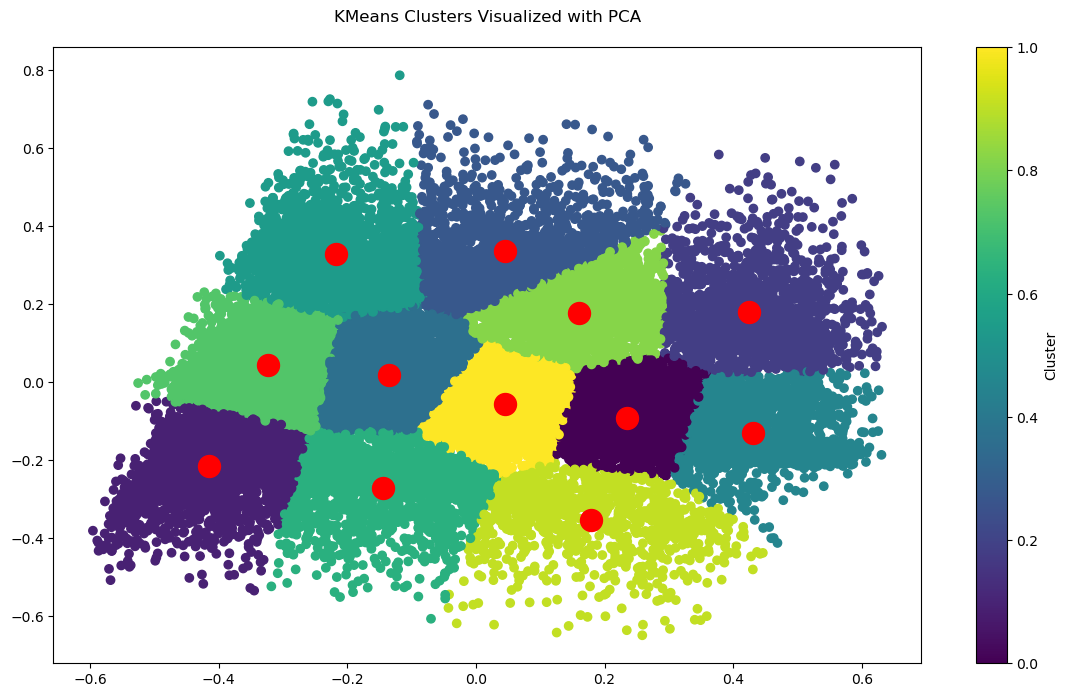

[0.26911167 0.14161009]
0.41072175543518996


In [430]:
#standardize data 
pca = PCA(n_components=2)
transformed_pca = pca.fit_transform(X1)

#parameters
kmeans_scaled = KMeans(n_clusters=12, random_state=50)
clusters = kmeans_scaled.fit_predict(transformed_pca)

plt.figure(figsize=(14, 8))
plt.scatter(transformed_pca[:,0], transformed_pca[:,1], c=clusters)
plt.scatter(kmeans_scaled.cluster_centers_[:,0], kmeans_scaled.cluster_centers_[:,1], color="red", s=250)
plt.title("KMeans Clusters Visualized with PCA\n")
plt.colorbar(label="Cluster")
plt.show()


print(f"{pca.explained_variance_ratio_}")
print(f"{sum(pca.explained_variance_ratio_)}")

clusters are represented by a different color, from dark purple (0.0) to yellow (1.0). the centroids show the mean position of all songs within that cluster

- Principal Component 1: 26.91%
- Principal Component 2: 14.16%
- Total variance explained: 41.07%

less than half (41.07%) of the variance is explained by these two principal components, there are significant features in the higher-dimensional space that aren't captured with the pca graph

## analysis

In [431]:
kmeans = KMeans(n_clusters=12, init="k-means++", n_init=50, random_state=50)
labels = kmeans.fit_predict(X1)

In [432]:
# load the original dataset 
dfog = pd.read_csv("/Users/sa2/Desktop/TKH/Music-Recommendation-Algorithm/train.csv")

# add the cluster label to the og dataset
dfog['cluster'] = labels

# save
dfog.to_csv("/Users/sa2/Desktop/TKH/Music-Recommendation-Algorithm/train_with_clusters.csv", index=False)

dfog.info()
dfog

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28362 entries, 0 to 28361
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28362 non-null  int64  
 1   artist_name               28362 non-null  object 
 2   track_name                28362 non-null  object 
 3   release_date              28362 non-null  int64  
 4   genre                     28362 non-null  object 
 5   lyrics                    28362 non-null  object 
 6   len                       28362 non-null  int64  
 7   dating                    28362 non-null  float64
 8   violence                  28362 non-null  float64
 9   world/life                28362 non-null  float64
 10  night/time                28362 non-null  float64
 11  shake the audience        28362 non-null  float64
 12  family/gospel             28362 non-null  float64
 13  romantic                  28362 non-null  float64
 14  commun

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age,cluster
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,sadness,1.000000,5
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,world/life,1.000000,10
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,music,1.000000,9
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,romantic,1.000000,2
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,romantic,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,0.001350,...,0.391651,0.001350,0.435089,0.001350,0.001350,0.065664,0.001350,obscene,0.014286,3
28358,82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,0.035338,...,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,obscene,0.014286,3
28359,82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,0.168988,...,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,obscene,0.014286,3
28360,82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.001196,0.001196,...,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,obscene,0.014286,3


In [433]:
#how many songs are in each cluster
dfog['cluster'].value_counts().sort_index()

cluster
0     2680
1     3103
2     1273
3     3160
4     1603
5     3057
6     3110
7     2819
8     1306
9     1802
10    2678
11    1771
Name: count, dtype: int64

In [434]:
kmeans.cluster_centers_

array([[0.01481101, 0.43033681, 0.05257716, 0.03130414, 0.01530886,
        0.01820126, 0.02245439, 0.06671491, 0.0220958 , 0.02515398,
        0.06190776, 0.06093428, 0.03690996, 0.04385182, 0.02467332,
        0.59196162],
       [0.02072632, 0.05046268, 0.05503441, 0.03726765, 0.01640328,
        0.01334611, 0.03237648, 0.087418  , 0.0211561 , 0.02924133,
        0.03484332, 0.04692453, 0.01920937, 0.42490984, 0.02360812,
        0.23070692],
       [0.03365908, 0.01932692, 0.05403302, 0.03736049, 0.01503415,
        0.01735703, 0.41757692, 0.08492546, 0.01171191, 0.03710602,
        0.02232285, 0.06182202, 0.01630039, 0.05325789, 0.03362979,
        0.682112  ],
       [0.01962089, 0.05000822, 0.04046776, 0.02766373, 0.02657353,
        0.01632037, 0.01321786, 0.06809038, 0.46763405, 0.0219891 ,
        0.06473141, 0.02710114, 0.0152622 , 0.02368549, 0.0201741 ,
        0.15614376],
       [0.02737656, 0.03779842, 0.0371055 , 0.17680073, 0.02183115,
        0.01564567, 0.07964962, 

In [435]:
# df with 12 cluster columns and your feature names 
clusters = pd.DataFrame(
    columns=[f'cluster{i+1}' for i in range(12)],
    index=['dating', 'violence', 'world/life', 'night/time', 'shake the audience','family/gospel', 'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual', 'sadness', 'feelings', 'age']
)

for i in range(12):
    clusters[f'cluster{i+1}'] = kmeans.cluster_centers_[i]


clusters

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11,cluster12
dating,0.014811,0.020726,0.033659,0.019621,0.027377,0.025375,0.011808,0.015098,0.037223,0.025507,0.019533,0.023843
violence,0.430337,0.050463,0.019327,0.050008,0.037798,0.023878,0.429664,0.048487,0.028845,0.024343,0.032565,0.050500
world/life,0.052577,0.055034,0.054033,0.040468,0.037105,0.052819,0.053895,0.420333,0.039402,0.042026,0.429507,0.040717
night/time,0.031304,0.037268,0.037360,0.027664,0.176801,0.034758,0.034214,0.034103,0.384729,0.030625,0.033044,0.030300
shake the audience,0.015309,0.016403,0.015034,0.026574,0.021831,0.011945,0.017358,0.017283,0.018149,0.014205,0.013331,0.022455
family/gospel,0.018201,0.013346,0.017357,0.016320,0.015646,0.016891,0.014713,0.015401,0.021425,0.023845,0.016514,0.021743
romantic,0.022454,0.032376,0.417577,0.013218,0.079650,0.046264,0.021374,0.029067,0.031938,0.028660,0.038786,0.017995
communication,0.066715,0.087418,0.084925,0.068090,0.087835,0.089779,0.075657,0.075726,0.079448,0.059203,0.078614,0.065304
obscene,0.022096,0.021156,0.011712,0.467634,0.025251,0.013613,0.028539,0.025290,0.021225,0.024104,0.016174,0.441709
music,0.025154,0.029241,0.037106,0.021989,0.136662,0.035202,0.025925,0.027226,0.029744,0.425019,0.034715,0.026595


<Axes: >

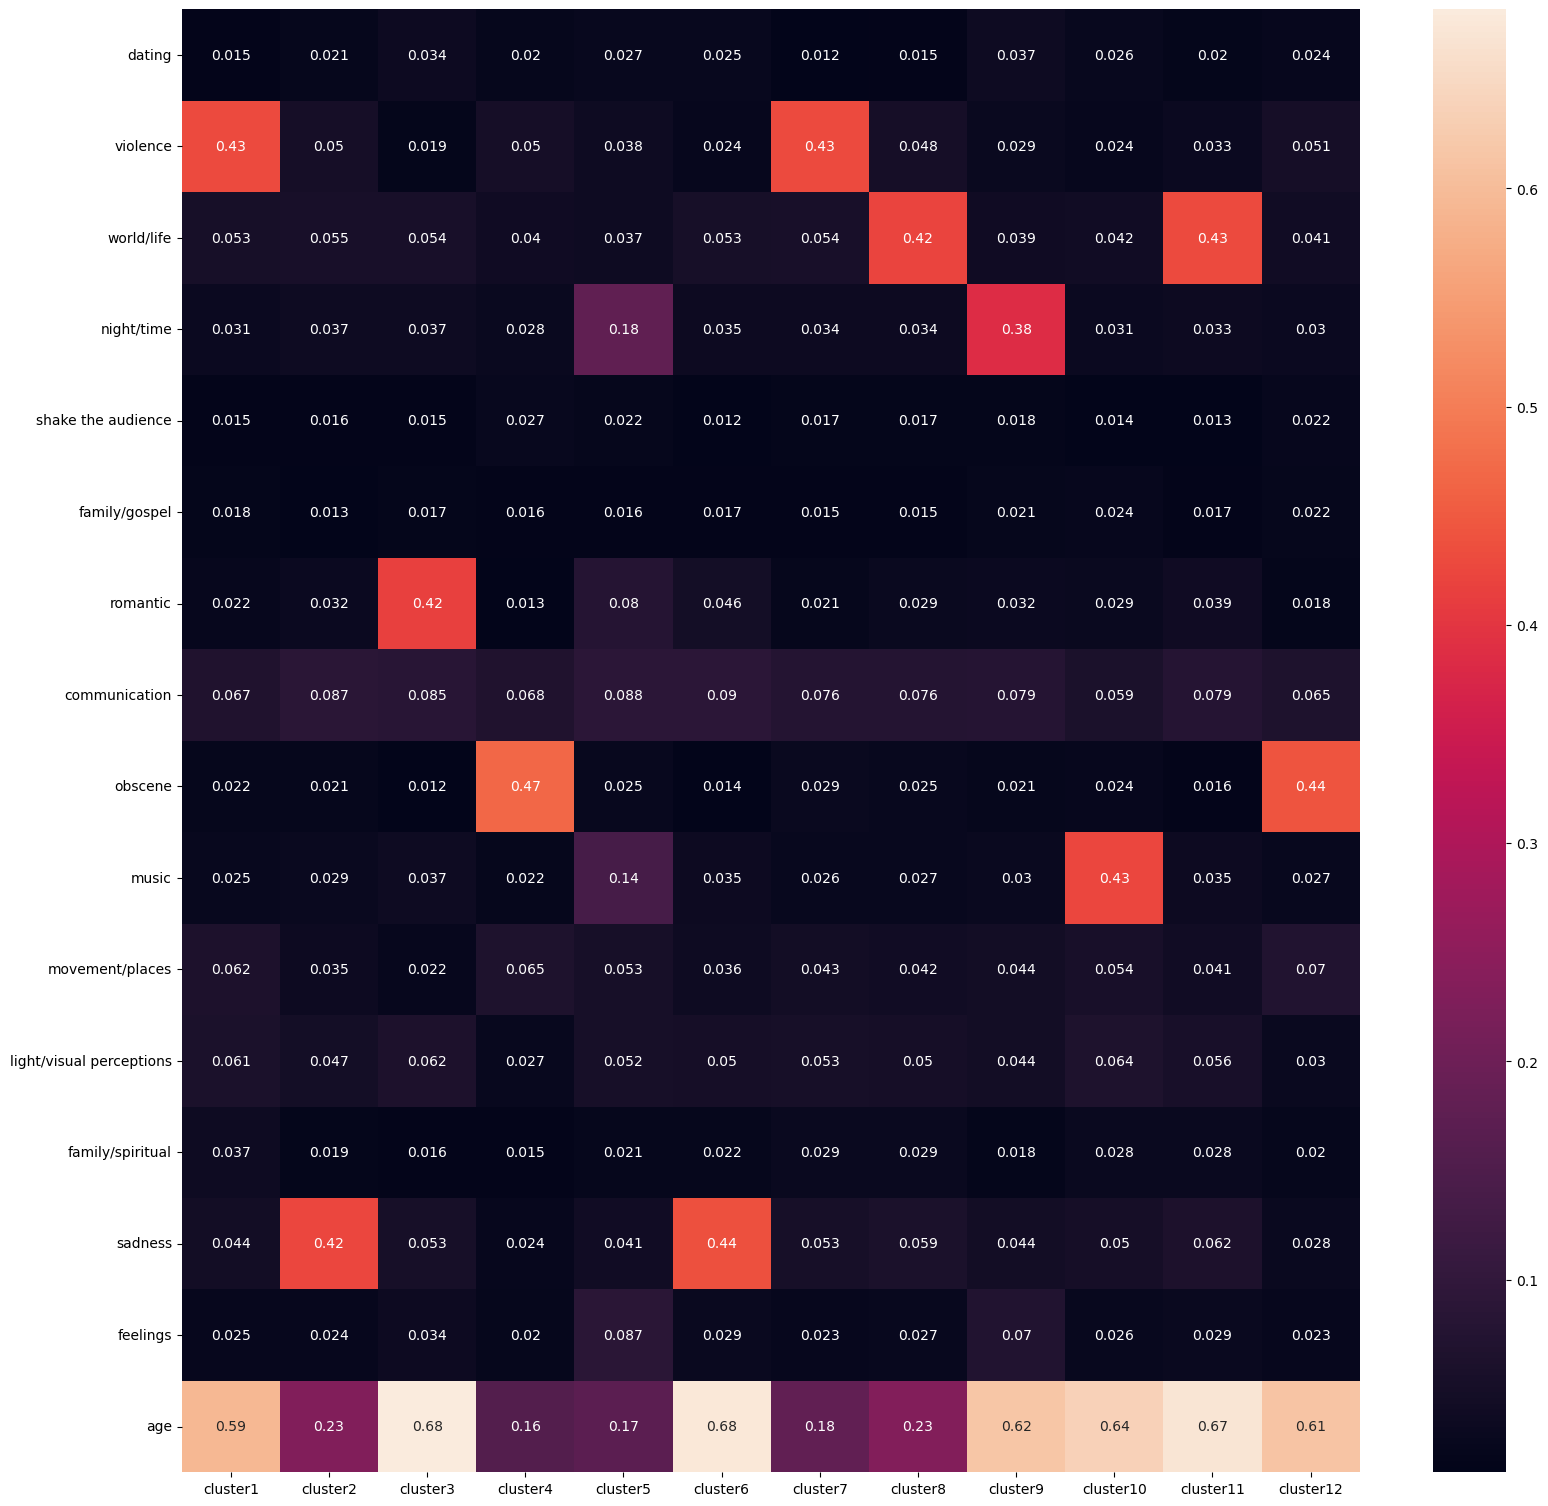

In [436]:
plt.figure(figsize=(19,19))
sns.heatmap(clusters, annot=True)

Cluster 1
- violence: 0.43
- sadness: 0.44
- age: 0.59
likely includes older darker, emotionally heavy tracks

Cluster 2
- sadness: 0.42
- communication: 0.087
- age: 0.23
newer songs about sadness and communication

Cluster 3
- age: 0.68
- romantic: 0.42
- communication: 0.085
older romantic songs

Cluster 4
- obscene: 0.47
- age: 0.16
newer songs with explicit themes (hip hop?)

Cluster 5
- night/time: 0.18
- music: 0.14
no clear dominate scores, maybe cluster for generalnpurpose 

Cluster 6
- age: 0.68 
- sadness: 0.44
- world/life: 0.053
- romantic: 0.046
older songs about heartbreak or sadness in life generally

Cluster 7
- violence: 0.43
- age: 0.18
newer aggressive or hype music

Cluster 8
- age: 0.23
- world/life: 0.42
- sadness: 0.059
newer songs about life experince, slightly sad or melancholy 

Cluster 9
- night/time: 0.62
- communication: 0.079
- feelings: 0.07
nightlife songs about time communication/feelings over time

Cluster 10
- music: 0.43 
- light/visual perceptions: 0.64 
- age: 0.64 
artistic tracks using vivid language and musical references.

Cluster 11
- age: 0.67
- world/life: 0.43
similar to other groups but older tracks about life

Cluster 12
- obscene: 0.44
- age: 0.61
similar to cluster 4 but older songs

## New Sample Prediction

In [437]:

scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

kmeans_scaled = KMeans(n_clusters=12, random_state=50)
kmeans_scaled.fit(X1_scaled)


KMeans(n_clusters=12, random_state=50)

In [438]:
test_df = pd.read_csv("/Users/sa2/Desktop/TKH/Music-Recommendation-Algorithm/recommend.csv")
test_df


,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,topic,age
0,76885,godsmack,immune,1998,rock,come world society futher place home land deat...,74,0.000907,0.348191,0.375448,...,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.000907,0.018854,world/life,0.314286
1,65394,dennis brown,second chance,1993,reggae,maybe maybe treat good feel second best girl s...,43,0.001224,0.029943,0.001224,...,0.001224,0.001224,0.001224,0.001224,0.001224,0.056842,0.001224,0.062092,night/time,0.385714
2,10980,the black crowes,sister luck,1990,pop,worry sick eye hurt rest head life outside gir...,54,0.001120,0.482490,0.001120,...,0.001120,0.001120,0.001120,0.078222,0.001120,0.051132,0.031571,0.202862,violence,0.428571
3,842,jerry lee lewis,your cheating heart,1960,pop,cheat heart weep sleep sleep come night cheat ...,25,0.204740,0.002506,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,sadness,0.857143
4,2764,paul anka,eso beso,1966,pop,beso kiss beso kiss know samba bossanova close...,97,0.001170,0.001170,0.001170,...,0.001170,0.001170,0.001170,0.314626,0.001170,0.053731,0.001170,0.001170,romantic,0.771429
5,54425,noro morales,silencio,1952,jazz,fear dark fear thunder fear silence spirit dea...,57,0.001462,0.487965,0.140561,...,0.001462,0.001462,0.001462,0.001462,0.077630,0.001462,0.001462,0.034645,violence,0.971429
6,77225,rage against the machine,pistol grip pump,2000,rock,pistolgrip pump time pistolgrip pump time pist...,152,0.000675,0.000675,0.134044,...,0.460145,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.000675,obscene,0.285714
7,42962,taste,railway and gun,1970,blues,railway leave time choose tell tell lose throw...,37,0.051874,0.001645,0.001645,...,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,sadness,0.714286
8,28825,randy travis,messin' with my mind,1986,country,say thing care hang long ahead leave start mes...,41,0.001504,0.001504,0.132148,...,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,night/time,0.485714
9,16881,paramore,playing god,2009,pop,decisions precision maybe want change simply a...,91,0.000711,0.543658,0.114697,...,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,violence,0.157143


In [439]:
test_df_clean = test_df.drop(['Unnamed: 0', 'artist_name', 'lyrics', 'track_name','genre', 'topic', 'like/girls', 'release_date'], axis=1)
features = ['dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual', 'sadness', 'feelings', 'age']
X_test = test_df_clean[features].values

X_test_scaled = scaler.transform(X_test)

test_df_clean['cluster'] = kmeans_scaled.predict(X_test_scaled)

In [440]:
test_df_clean.info()
test_df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   len                       10 non-null     int64  
 1   dating                    10 non-null     float64
 2   violence                  10 non-null     float64
 3   world/life                10 non-null     float64
 4   night/time                10 non-null     float64
 5   shake the audience        10 non-null     float64
 6   family/gospel             10 non-null     float64
 7   romantic                  10 non-null     float64
 8   communication             10 non-null     float64
 9   obscene                   10 non-null     float64
 10  music                     10 non-null     float64
 11  movement/places           10 non-null     float64
 12  light/visual perceptions  10 non-null     float64
 13  family/spiritual          10 non-null     float64
 14  sadness      

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,cluster
0,74,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,0.000907,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286,2
1,43,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,0.069637,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714,10
2,54,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,0.001120,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571,11
3,25,0.204740,0.002506,0.002506,0.129818,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143,1
4,97,0.001170,0.001170,0.001170,0.050289,0.001170,0.023530,0.541449,0.001170,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,0.771429,6


In [449]:
test_df_clean['cluster'].value_counts().sort_index()

cluster
1     1
2     1
4     1
5     1
6     1
10    2
11    3
Name: count, dtype: int64

In [454]:
# bringing back dropped column
clustercol = test_df[['genre', 'artist_name', 'track_name']]
df = pd.concat([clustercol, test_df_clean], axis=1)

In [455]:
df[test_df_clean['cluster']==10]

,genre,artist_name,track_name,len,dating,violence,world/life,night/time,shake the audience,family/gospel,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,cluster
1,reggae,dennis brown,second chance,43,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,...,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714,10
7,blues,taste,railway and gun,37,0.051874,0.001645,0.001645,0.084118,0.037341,0.001645,...,0.460564,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,0.714286,10


In [456]:
df[test_df_clean['cluster']==11]

,genre,artist_name,track_name,len,dating,violence,world/life,night/time,shake the audience,family/gospel,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,cluster
2,pop,the black crowes,sister luck,54,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,...,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571,11
5,jazz,noro morales,silencio,57,0.001462,0.487965,0.140561,0.001462,0.001462,0.001462,...,0.238731,0.001462,0.001462,0.001462,0.001462,0.077630,0.001462,0.034645,0.971429,11
9,pop,paramore,playing god,91,0.000711,0.543658,0.114697,0.098286,0.014720,0.000711,...,0.075524,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,0.157143,11


previously determined column characteristics

Cluster 10
- music: 0.43 
- light/visual perceptions: 0.64 
- age: 0.64 
artistic tracks using vivid language and musical references.

Cluster 11
- age: 0.67
- world/life: 0.43
similar to other groups but older tracks about life

In [467]:
clustercol = test_df[['genre', 'artist_name', 'track_name']]
df = pd.concat([clustercol, dfog], axis=1)

In [475]:
cluster10 = dfog[(dfog['cluster']==10) & ((dfog['genre']=="reggae") | (dfog['genre']=="blues"))]
cluster10

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age,cluster
12486,39735,ella fitzgerald,i've got a crush on you,1950,blues,hmmmmm crush guess crush sweetie night time si...,58,0.117395,0.001949,0.332981,...,0.001949,0.001949,0.001949,0.001949,0.048673,0.261356,0.001949,world/life,1.000000,10
12496,39767,ella fitzgerald,thanks for the memory,1953,blues,thank memory things forget journey wond rous w...,68,0.024924,0.001170,0.463220,...,0.001170,0.114241,0.001170,0.001170,0.001170,0.164639,0.030260,world/life,0.957143,10
12500,39773,billie holiday,yesterdays,1953,blues,yesterdays yesterdays days know sweet sequeste...,44,0.001815,0.001815,0.638862,...,0.001815,0.001815,0.001815,0.127205,0.074623,0.001815,0.001815,world/life,0.957143,10
12502,39777,billie holiday,remember,1953,blues,sweet expression smile give look meet easy rem...,37,0.001504,0.001504,0.440735,...,0.001504,0.041758,0.001504,0.001504,0.001504,0.109658,0.001504,world/life,0.957143,10
12505,39791,ella fitzgerald,i'm glad there is you,1954,blues,world ordinary people extraordinary people wor...,23,0.004049,0.004049,0.624279,...,0.004049,0.160921,0.004049,0.004049,0.150023,0.004049,0.004049,world/life,0.942857,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21560,64820,pat kelly,just for a day,1987,reggae,things things guarantee wait long long shit fe...,50,0.001196,0.107451,0.422002,...,0.042599,0.061707,0.001196,0.001196,0.051313,0.001196,0.001196,world/life,0.471429,10
21587,64888,ziggy marley & the melody makers,tomorrow people,1988,reggae,tomorrow people past tomorrow people long tomo...,123,0.000458,0.000458,0.590838,...,0.000458,0.000458,0.000458,0.015049,0.176431,0.013027,0.000458,world/life,0.457143,10
21589,64897,peter tosh,lesson in my life,1988,reggae,learn lesson life lesson life careful mankind ...,98,0.001096,0.001096,0.571052,...,0.030279,0.001096,0.001096,0.001096,0.320317,0.001096,0.001096,world/life,0.457143,10
21590,64902,ub40,matter of time,1988,reggae,matter time till breath money mountains climb ...,68,0.000923,0.000923,0.301652,...,0.089974,0.000923,0.000923,0.000923,0.000923,0.000923,0.000923,world/life,0.457143,10


In [476]:
cluster10 = dfog[(dfog['cluster']==11) & ((dfog['genre']=="pop") | (dfog['genre']=="jazz"))]
cluster10

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age,cluster
10,28,liva weel,"drømmer man om den, vågner..",1951,pop,better sail midnight better dive pearl better ...,113,0.017090,0.026486,0.000774,...,0.720557,0.080988,0.000774,0.065153,0.000774,0.000774,0.000774,obscene,0.985714,11
12,33,frankie laine,necessary evil,1951,pop,come motherfucker spit shit minutes chillin bi...,173,0.000627,0.244358,0.083570,...,0.458984,0.000627,0.000627,0.000627,0.000627,0.000627,0.032581,obscene,0.985714,11
27,68,asha bhosle,gullyachi shapath,1952,pop,fuck fuck fuck rise fuck bitch know power face...,127,0.000693,0.040706,0.000693,...,0.688167,0.000693,0.064938,0.122569,0.000693,0.000693,0.000693,obscene,0.971429,11
38,100,talat mahmood,ansoo to nahin hai ankhon men,1953,pop,yeah dance ceiling dance floor people come doo...,104,0.265570,0.000537,0.000537,...,0.414400,0.000537,0.094683,0.033427,0.000537,0.000537,0.000537,obscene,0.957143,11
52,138,a. m. rajah,gopiparivrito,1954,pop,deal pharmaceuticals sell pills yesterday sist...,73,0.167089,0.219531,0.067068,...,0.328817,0.000993,0.000993,0.000993,0.000993,0.000993,0.000993,obscene,0.942857,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19145,59200,digable planets,escapism (gettin' free),1993,jazz,planets champ amplify sound swimmin bear boogi...,179,0.000711,0.167313,0.073250,...,0.356301,0.000711,0.100107,0.044113,0.249669,0.000711,0.000711,obscene,0.385714,11
19147,59206,bing crosby,ac-cent-tchu-ate the positive,1993,jazz,accenttchuate positive eliminate negative latc...,88,0.001548,0.001548,0.001548,...,0.332043,0.106306,0.232381,0.078780,0.075647,0.001548,0.001548,obscene,0.385714,11
19150,59212,digable planets,it's good to be here,1993,jazz,ticky ticky buzz wake fumble fuzz buzz tell sc...,190,0.037381,0.120374,0.000627,...,0.361070,0.000627,0.083759,0.000627,0.072994,0.000627,0.082369,obscene,0.385714,11
19161,59234,freestyle fellowship,park bench people,1993,jazz,sittin bench lookin sky mouthstench range peop...,155,0.000428,0.087551,0.025475,...,0.416071,0.000428,0.088809,0.038187,0.123779,0.106781,0.000428,obscene,0.385714,11
